In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

from sklearn import preprocessing, metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, LabelEncoder


In [2]:
train_x = pd.read_csv('data/classificaition_train_x.csv')
train_y = pd.read_csv('data/classificaition_train_y.csv')
val_x = pd.read_csv('data/classificaition_val_x.csv')
val_y = pd.read_csv('data/classificaition_val_y.csv')
train = pd.concat([train_x, train_y], axis = 1)
val = pd.concat([val_x, val_y], axis =1)
data = pd.concat([train, val], ignore_index = True)
print(data.shape)
                  

(32950, 21)


In [3]:
print(data.shape)
data = data.drop_duplicates()
print(data.shape)
from scipy import stats
def catagorize(df):
    catags = []
    for col in list(df.columns):
        if(type(df[col][0])==str):
            catags.append(col)
    cols = list(df.columns)
    quant = [i for i in cols if i not in catags]
    return (catags, quant)

(categorical_cols,quant) = catagorize(data)
print(data.shape)
for x in quant:
    data[np.abs(data[x]-data[x].mean()) <= (3*data[x].std())]
data_x = data.iloc[:,:-1]
data_y = data["y"]
print(data.shape)

(32950, 21)
(32944, 21)
(32944, 21)
(32944, 21)


In [4]:
from sklearn.model_selection import train_test_split 
X_rest, X_test, y_rest, y_test = train_test_split(data_x, data_y, test_size=0.2)
X_train, X_cv, y_train, y_cv = train_test_split(X_rest, y_rest, test_size=0.2)




In [5]:

from sklearn.feature_extraction.text import CountVectorizer

def add_onehot_to_dataframe(sparse, df, vectorizer, name):
  '''
      This function will add the one hot encoded to the dataframe.

  '''
  for i, col in enumerate(vectorizer.get_feature_names()):
    colname = name+"_"+col
    # df[colname] = pd.SparseSeries(sparse[:, i].toarray().flatten(), fill_value=0)
    df[colname] = sparse[:, i].toarray().ravel().tolist()
  
  return df

def OneHotEncoder(categorical_cols, X_train, X_test, X_cv=None, include_cv=False):
  '''
    This function takes categorical column names as inputs. The objective
    of this function is to take the column names iteratively and encode the 
    features using One hot Encoding mechanism and also adding the encoded feature
    to the respective dataframe.

    The include_cv parameter indicates whether we should include CV dataset or not.
    This is added specifically because when using GridSearchCV or RandomizedSearchCV,
    we only split the dataset into train and test to give more data to training purposes.
    This is done because GridSearchCV splits the data internally anyway.
  '''

  for i in categorical_cols:
    Vectorizer = CountVectorizer(token_pattern="[A-Za-z0-9-.]+")
    print("Encoding for feature: ", i)
    # Encoding training dataset 
    temp_cols = Vectorizer.fit_transform(X_train[i])
    X_train = add_onehot_to_dataframe(temp_cols, X_train, Vectorizer, i)

    # Encoding Cross validation dataset
    if include_cv:
      temp_cols = Vectorizer.transform(X_cv[i])
      X_cv = add_onehot_to_dataframe(temp_cols, X_cv, Vectorizer, i)

    # Encoding Test dataset
    temp_cols = Vectorizer.transform(X_test[i])
    X_test = add_onehot_to_dataframe(temp_cols, X_test, Vectorizer, i)

In [6]:

def catagorize(df):
    catags = []
    for col in list(df.columns):
        if(type(df[col][0])==str):
            catags.append(col)
    cols = list(df.columns)
    quant = [i for i in cols if i not in catags]
    return (catags, quant)

(categorical_cols,_) = catagorize(data_x)


In [7]:
(categorical_cols,_) = catagorize(data_x)

OneHotEncoder(categorical_cols, X_train, X_test, X_cv, True)

# Drop the categorical features as the one hot encoded representation is present
X_train = X_train.drop(categorical_cols, axis=1)
X_cv = X_cv.drop(categorical_cols, axis=1)
X_test = X_test.drop(categorical_cols, axis=1)

print("Shape of train: ", X_train.shape)
print("Shape of CV: ", X_cv.shape)
print("Shape of test: ", X_test.shape)

Encoding for feature:  f1
Encoding for feature:  f2
Encoding for feature:  f3
Encoding for feature:  f4
Encoding for feature:  f7
Encoding for feature:  f8
Encoding for feature:  f9
Encoding for feature:  f12
Encoding for feature:  f17
Encoding for feature:  f20
Shape of train:  (21084, 63)
Shape of CV:  (5271, 63)
Shape of test:  (6589, 63)


/Users/unajun/.virtualenvs/CSED490_Project/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [8]:
# from sklearn.manifold import TSNE
# model = TSNE(n_components=2, random_state=0, perplexity=30)
# tnse_data = model.fit_transform(X_train)
# plt.figure(figsize=(8,8))
# plt.scatter(tnse_data[:,0], tnse_data[:,1], c=y_train.values)
# plt.show()

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
prediction = []

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

def add_onehot_to_dataframe(sparse, df, vectorizer, name):
  '''
      This function will add the one hot encoded to the dataframe.

  '''
  for i, col in enumerate(vectorizer.get_feature_names()):
    colname = name+"_"+col
    # df[colname] = pd.SparseSeries(sparse[:, i].toarray().flatten(), fill_value=0)
    df[colname] = sparse[:, i].toarray().ravel().tolist()
  
  return df

def OneHotEncoder(categorical_cols, df):
  '''
    This function takes categorical column names as inputs. The objective
    of this function is to take the column names iteratively and encode the 
    features using One hot Encoding mechanism and also adding the encoded feature
    to the respective dataframe.

    The include_cv parameter indicates whether we should include CV dataset or not.
    This is added specifically because when using GridSearchCV or RandomizedSearchCV,
    we only split the dataset into train and test to give more data to training purposes.
    This is done because GridSearchCV splits the data internally anyway.
  '''

  for i in categorical_cols:
    Vectorizer = CountVectorizer(token_pattern="[A-Za-z0-9-.]+")
    print("Encoding for feature: ", i)
    # Encoding training dataset 
    temp_cols = Vectorizer.fit_transform(df[i])
    df = add_onehot_to_dataframe(temp_cols, df, Vectorizer, i)
final_test_x = pd.read_csv('data/classificaition_test_x.csv')
OneHotEncoder(categorical_cols,final_test_x)
final_test_x = final_test_x.drop(categorical_cols, axis=1)
final_test_x['f3_c1'] = 0

Encoding for feature:  f1
Encoding for feature:  f2
Encoding for feature:  f3
Encoding for feature:  f4
Encoding for feature:  f7
Encoding for feature:  f8
Encoding for feature:  f9
Encoding for feature:  f12
Encoding for feature:  f17
Encoding for feature:  f20


In [17]:
final_test_x = pd.read_csv('data/classificaition_test_x.csv')
OneHotEncoder(categorical_cols,final_test_x)
final_test_x = final_test_x.drop(categorical_cols, axis=1)
final_test_x['f3_c1'] = 0

def learning_poly(degree=1):
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_cv_poly = poly_features.fit_transform(X_cv)
    alpha = [10 ** x for x in range(-5, 4)]
    log_loss_array=[]
    for i in alpha:
        logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
        logisticR.fit(X_train_poly,y_train)
        sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
        sig_clf.fit(X_train_poly, y_train)
        predict_y = sig_clf.predict_proba(X_cv_poly)
        log_loss_array.append(log_loss(y_cv, predict_y[:,1]))
        
    for i in range(len(log_loss_array)):
        print ('Log Loss for k = ',alpha[i],'is',log_loss_array[i])
    
    best_alpha = np.argmax(log_loss_array)
        
    fig, ax = plt.subplots()
    ax.plot(alpha, log_loss_array,c='g')
    for i, txt in enumerate(np.round(log_loss_array,3)):
        ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_loss_array[i]))
    plt.grid()
    plt.title("Cross Validation Error for each alpha")
    plt.xlabel("Alpha i's")
    plt.ylabel("Error measure")
    plt.show()
    
    logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
        
    predict_y = sig_clf.predict_proba(X_train)
    print("X_train")
    print ('\tFor values of best alpha = ', alpha[best_alpha], "\n\tThe train AUC is:",roc_auc_score(y_train, predict_y[:,1]), "\n\tLog loss is: ", log_loss(y_train, predict_y[:,1]))
    print("X_cv")
    predict_y = sig_clf.predict_proba(X_cv)
    print('\tFor values of best alpha = ', alpha[best_alpha], "\n\tThe cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]), "\n\tLog loss is: ", log_loss(y_cv, predict_y[:,1]))
    print("X_test")
    predict_y = sig_clf.predict_proba(X_test)
    print('\tFor values of best alpha = ', alpha[best_alpha], "\n\tThe test AUC is:",roc_auc_score(y_test, predict_y[:,1]), "\n\tLog loss is: ", log_loss(y_test, predict_y[:,1]))
    

AUC for k =  1e-05 is 0.26816041818275904
AUC for k =  0.0001 is 0.24272332042866226
AUC for k =  0.001 is 0.23125796592776973
AUC for k =  0.01 is 0.22966070751476053
AUC for k =  0.1 is 0.22977092350545564
AUC for k =  1 is 0.22956588333579034
AUC for k =  10 is 0.22994214527474532
AUC for k =  100 is 0.22945930571529669
AUC for k =  1000 is 0.2291646905631802
X_train
	For values of best alpha =  1e-05 
	The train AUC is: 0.8821949146566376 
	Log loss is:  0.25881942546032966
X_cv
	For values of best alpha =  1e-05 
	The cross validation AUC is: 0.8865863589329824 
	Log loss is:  0.2681611762619238
X_test
	For values of best alpha =  1e-05 
	The test AUC is: 0.884576024877795 
	Log loss is:  0.23683813504529636


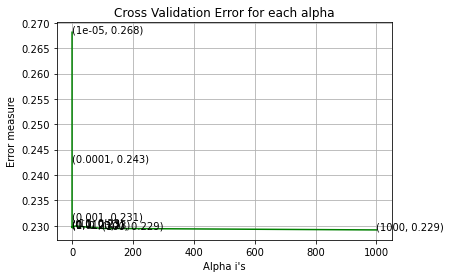

In [18]:
test_y_prob_pd = pd.DataFrame(predict_y[:,1], columns=["y"])
test_y_prob_pd.to_csv('test.csv', index_label='id')
learning_poly(1)

AUC for k =  1e-05 is 0.21461694566491862
AUC for k =  0.0001 is 0.21497461394040998
AUC for k =  0.001 is 0.21335168591386924
AUC for k =  0.01 is 0.21542286477409944
AUC for k =  0.1 is 0.21403504745197133
AUC for k =  1 is 0.21391565127199616
AUC for k =  10 is 0.21467775433891673
AUC for k =  100 is 0.21456162614204397
AUC for k =  1000 is 0.21501037582203336
X_train
	For values of best alpha =  0.01 
	The train AUC is: 0.9267840544594433 
	Log loss is:  0.22458849029610448
X_cv
	For values of best alpha =  0.01 
	The cross validation AUC is: 0.9320201860089841 
	Log loss is:  0.23007919303679275
X_test
	For values of best alpha =  0.01 
	The test AUC is: 0.9332033978895325 
	Log loss is:  0.20030384868750045


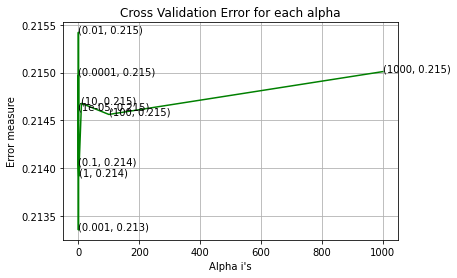

In [19]:
learning_poly(2)

KeyboardInterrupt: 